In [2]:
from RNN_MODELS import RNN
from EDNN import EDNN
from metrics import *
from comparisons import *
import numpy as np
from matplotlib import pyplot as plt
import time

In [3]:
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']

def errplt(in_,out,errs,seed,title="Ising Model Phase Transition",style = "error",ylabel="|M|",errc=None,**kwargs):
    """Plots phase transitions"""
    if style=="error":
        plt.errorbar(in_, out, errs, linestyle='None', marker='.',**kwargs)
    elif style == "dot":
        plt.plot(in_,out,"o",**kwargs)
    elif style=="scatter":
        plt.scatter(in_,out,**kwargs)
    else:
        plt.plot(in_,out,**kwargs)
    if errc != None:
        tonp = np.asarray
        plt.fill_between(in_,tonp(out)-tonp(errs),tonp(out)+tonp(errs),color=errc)
    plt.ylabel(ylabel,fontname='Times New Roman')
    plt.xlabel(r'$K_B T$',fontname='Times New Roman')
    plt.title(title,fontname='Times New Roman')
    if ylabel=="|M|":
        plt.ylim(0,1.1)
    else:
        plt.ylim(-95,-10)
    plt.xlim(min(in_),max(in_))
    
def out(a):
 for i in range(len(a[0])):
   print("%f\t%f\t%f"%(a[0][i],a[1][i],a[2][i]))

import matplotlib
def deltaplt(x,y,e,s,c,delta=False,points=False,lims=None,**kwargs):
 """plots the energy reference vs network graphs"""
 tonp=np.asarray
 #kwargs = dict()
 if delta:
     ref=[0]*len(x)
     if points:
         y = tonp(y)-tonp(x)
     plt.ylabel(r"$E^{%s}(\sigma_i$)-E($\sigma_i$) - ($\overline{E^{%s}(\sigma)}-\overline{E(\sigma)}$ ) [J]"%(s,s))
 else:
     ref=x
     plt.ylabel(r"$E^{%s}(\sigma_i$) - $\overline{E^{%s}(\sigma)}$ [J]"%(s,s))
     kwargs["linewidth"] = 0.5
     #plt.axis('equal')
     plt.gca().set_aspect('equal', adjustable='box')
 if type(c)==str:
     c=list(matplotlib.colors.to_rgba(c, alpha=None)[:3])
 if points:
   plt.plot(x,y,"b.",color=c+[1.0] if len(c)==2 else c,fillstyle="full",ms=1.5,mew=0.1,alpha=0.3,**kwargs)
   if not delta:
       if lims==None:
            max_,min_ = x[-1]+10,x[0]-10
       else:
            min_,max_ = lims
       plt.plot([min_,max_],[min_,max_],"k--",**kwargs)
       plt.xlim(min_,max_)
       plt.ylim(min_,max_)
 else:
   c2=0.6-np.sum(e)/len(e)/6
   print(c2,np.sum(e)/len(e))
   plt.plot(x, y,color=c+[1],label=s,**kwargs)
   plt.fill_between(x,tonp(y)-tonp(e),tonp(y)+tonp(e),color=c+[c2],lw=0)
   plt.plot(x,ref,"k--",**kwargs)
   plt.xlim(min(x),max(x))
 plt.xlabel(r"E($\sigma_i$) - $\overline{E(\sigma)}$ [J]")

In [ ]:
#older
ISINGEDNN8 = [[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 1.0, 0.99998671875, 0.99989515625, 0.999608125, 0.99911765625, 0.99835546875, 0.9964290625, 0.99358875, 0.992604375, 0.9829325, 0.9825515625, 0.96554296875, 0.95846578125, 0.94456265625, 0.919136875, 0.8838171875, 0.82299484375, 0.77623890625, 0.68346390625, 0.60000546875, 0.5707115625, 0.48712359375, 0.4135465625, 0.41720796875, 0.34589890625, 0.3234203125, 0.31249515625, 0.2937415625, 0.26804546875, 0.25723921875, 0.24589515625, 0.23190765625, 0.225143125, 0.21601890625, 0.21458140625, 0.20536515625, 0.19573078125, 0.19922125, 0.1835159375, 0.19006453125, 0.18407171875, 0.17899296875, 0.171180625, 0.17142046875], [0.0, 0.0, 0.0006440983394625684, 0.0018070348573245448, 0.0036567505533430912, 0.005265210923537245, 0.007477545120577569, 0.011799611317585584, 0.01658869904294788, 0.016951275659500525, 0.027818455373636402, 0.027597399912556865, 0.04443309477741814, 0.055018919694861765, 0.06570275705883154, 0.08888525529571469, 0.1073303593244467, 0.1825986993723547, 0.21250531076538112, 0.2519499035374963, 0.2634730939947289, 0.26012302138975246, 0.2592777376335991, 0.24652449885368105, 0.24512015961041747, 0.22463041776380427, 0.21940819437586498, 0.20619377779160938, 0.19694298411293712, 0.18974608013021052, 0.17823248117192939, 0.1764920790537796, 0.16970331449089124, 0.1651770682941018, 0.15208183290704455, 0.1527131283942542, 0.15568231644313554, 0.14609357734540265, 0.14690373719399552, 0.13836544505988874, 0.13566243843785677, 0.13631502824976194, 0.13437583048208118, 0.12581634320850127, 0.12838619885950658], 42]
ISINGEDNN16= [[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.077390703125, 1.0, 0.99999546875, 0.9999233203125, 0.9996907421875, 0.9993054296875, 0.9984109765625, 0.99751625, 0.9953323046875, 0.9921395703125, 0.986123671875, 0.9816348046875, 0.9719670703125, 0.9618756640625, 0.942557578125, 0.9097476171875, 0.887508828125, 0.789787265625, 0.752942890625, 0.567271640625, 0.3635918359375, 0.2919508984375, 0.260913828125, 0.19654640625, 0.1783946484375, 0.166167578125, 0.1583415625, 0.130907890625, 0.142700625, 0.1429311328125, 0.1297581640625, 0.12096234375, 0.1225626171875, 0.1083751953125, 0.098362265625, 0.1059653125, 0.09855546875, 0.099050078125, 0.093404921875, 0.0994539453125, 0.0871409765625, 0.09015015625, 0.0890649609375, 0.088510078125, 0.084867890625], [0.061918168672937195, 0.0, 0.00018809534390419518, 0.0007701819811698092, 0.001585148891351051, 0.002483476903498884, 0.0036979251630028195, 0.004478047539455672, 0.00688998975678279, 0.008454508904215691, 0.012540291828124316, 0.015267657843823713, 0.018847513541841533, 0.02618680147204627, 0.03839196528228379, 0.04987622875685168, 0.05612907070595601, 0.207942466074659, 0.1460684626017526, 0.208037258040129, 0.22457141249023616, 0.1854425999458622, 0.1609458043251725, 0.1370227345906589, 0.12416056265781544, 0.11383095255836816, 0.11895134708665754, 0.0952039008730681, 0.10165849253789927, 0.10737282710251356, 0.09840601839965818, 0.09601711155264506, 0.08925291129861947, 0.07859549629931777, 0.0744344822143823, 0.07732688031239625, 0.0734807851117532, 0.06822868752053747, 0.0709246439217257, 0.07288114625909761, 0.06768747706834964, 0.06892788678138524, 0.06504386145056901, 0.06744410848639891, 0.06503051776260442], 42]
#OLD
POTTSEDNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 0.9999451421769262, 0.9995057284461998, 0.9983124417974689, 0.9962511159827242, 0.9918996998502057, 0.9858448999870628, 0.966113410632147, 0.9382855807534762, 0.9010105979127243, 0.7987917443574236, 0.6493929741457131, 0.4708481915793801, 0.387925712748612, 0.31307594287950724, 0.2826673689168367, 0.26161888461480687, 0.23376858975695436, 0.23421694135989055, 0.21561803159977147, 0.20823331686420246, 0.20429558068071546, 0.1904098342047918, 0.18676064720006275, 0.1792725222119932, 0.1797268921246753, 0.17170776705697116, 0.17219661362442187, 0.16650778218820117, 0.16429399503317582, 0.16007940488326047, 0.158054110962782, 0.15709820751289122, 0.15244107213496344, 0.1524287857848406, 0.15189429863908124, 0.1510637019735187, 0.15179925395330193, 0.1445745149993908, 0.14526926211146932, 0.1456102247381591, 0.14356096847997327, 0.14221461264840518, 0.14237086718195058, 0.1414985923640095], [0.0, 0.0011303000369226894, 0.0033869470992515974, 0.006290726498173558, 0.010786820881949632, 0.015820999986975157, 0.020277202879284, 0.04466625493505773, 0.06796060838389122, 0.08339912423739305, 0.17241009354838072, 0.23082612756215748, 0.21447584810876513, 0.19411462673459068, 0.15746344639023946, 0.15021393713303677, 0.13075718541297482, 0.11656997863775768, 0.12057729106366565, 0.10897520546468922, 0.10621744218854275, 0.1040317277675325, 0.09754036033136443, 0.09744201106655659, 0.09445043284244599, 0.09165888356650685, 0.08770858151498877, 0.08915357096194158, 0.085777313912798, 0.08474485081117056, 0.08332705940741454, 0.07977236785867785, 0.08112522343807255, 0.07895800929241441, 0.07797722856267349, 0.07748147913728137, 0.07942611627201666, 0.07848191393962804, 0.07399924212684325, 0.07612990466319214, 0.07649336068605267, 0.07413535965885888, 0.07365660661007231, 0.07322353501575248, 0.07335311920624185], 42]
ISINGRNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 1.0, 0.999997, 0.999881, 0.999739, 0.999374, 0.998399, 0.997534, 0.994823, 0.992532, 0.986412, 0.98214, 0.970809, 0.96044, 0.941048, 0.912384, 0.898422, 0.829396, 0.745182, 0.665077, 0.637154, 0.546753, 0.484268, 0.432283, 0.377626, 0.342036, 0.321249, 0.304535, 0.282262, 0.26425, 0.257043, 0.234345, 0.230677, 0.225207, 0.209744, 0.20488, 0.204477, 0.199225, 0.19567, 0.186506, 0.187856, 0.183205, 0.179707, 0.181759, 0.1725], [0.0, 0.0, 0.000288, 0.001921, 0.003014, 0.004396, 0.007474, 0.010065, 0.014817, 0.017213, 0.024218, 0.028134, 0.043104, 0.047177, 0.071512, 0.110986, 0.099585, 0.179203, 0.245034, 0.255862, 0.242783, 0.267695, 0.255067, 0.255614, 0.237362, 0.215386, 0.2159, 0.20899, 0.194748, 0.182019, 0.181173, 0.166912, 0.168053, 0.163075, 0.150607, 0.152, 0.15025, 0.147518, 0.145252, 0.138808, 0.143115, 0.134207, 0.132449, 0.131259, 0.128397], 42]
SPINSRNN420_8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [-77.041037, -79.517756, -78.33445, -77.003578, -73.853827, -73.108504, -70.626501, -67.776758, -65.082127, -63.301004, -60.968198, -58.524317, -56.419904, -54.644988, -52.425556, -50.542594, -48.575742, -47.766093, -45.93728, -44.046916, -43.074303, -41.705133, -40.065686, -39.180005, -38.060725, -36.773293, -35.646702, -34.696021, -33.577352, -32.631268, -32.00566, -31.794534, -30.293125, -29.866886, -28.737255, -28.43137, -27.772762, -27.518104, -26.487563, -26.366854, -25.577775, -24.75855, -24.210722, -23.953811, -23.858283], [1.304537, 1.815045, 2.461074, 3.05379, 3.918852, 4.356332, 5.285965, 5.663386, 6.401137, 6.61443, 7.056904, 7.498197, 7.731747, 8.013701, 8.151139, 8.403692, 8.65937, 8.836432, 8.882284, 9.086026, 9.253841, 9.210163, 9.343783, 9.581207, 9.798672, 9.841284, 9.847002, 9.676807, 9.941899, 10.001084, 9.88654, 10.095146, 10.249649, 10.233461, 10.175446, 10.380775, 10.286123, 10.184549, 10.289641, 10.42439, 10.290813, 10.385798, 10.382638, 10.46146, 10.344264], 420]
#dropout

ISINGRNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 1.0, 0.99995484375, 0.99988140625, 0.99967890625, 0.99928890625, 0.9982509375, 0.99595125, 0.99281125, 0.99156265625, 0.9810978125, 0.978535, 0.95989265625, 0.952223125, 0.9208265625, 0.90245046875, 0.85002953125, 0.74124828125, 0.72151296875, 0.62698015625, 0.5512065625, 0.49235796875, 0.4339753125, 0.38560328125, 0.3447421875, 0.3192153125, 0.28953578125, 0.28456421875, 0.274505, 0.2457884375, 0.24248078125, 0.22963140625, 0.22538296875, 0.219865, 0.2160078125, 0.1987959375, 0.1903853125, 0.194759375, 0.18125078125, 0.19121828125, 0.1814534375, 0.173109375, 0.1710590625, 0.1713659375, 0.1731721875], [0.0, 0.0, 0.0011870525369948612, 0.0019214552323593012, 0.0033041499082533976, 0.0047523852949030694, 0.00783542630436237, 0.013528189838721958, 0.017879304507935984, 0.01808205310540913, 0.03124878564984316, 0.03450325315278257, 0.05336617682466897, 0.06135782203280502, 0.11066169235019223, 0.10766440048870737, 0.15201670378437948, 0.2306870982559133, 0.23165253771597027, 0.26404456277239086, 0.264978565001131, 0.266566937871497, 0.25500323300627453, 0.24255334689671032, 0.22614334489205037, 0.21424848737774638, 0.19574774785425922, 0.19327117581105993, 0.1862269099949038, 0.176233673465611, 0.1761318016279347, 0.16498836452219884, 0.16136161596976534, 0.1539343944368022, 0.15738810489984575, 0.14635296001574788, 0.14034640866407072, 0.14241577386822138, 0.13358768260847312, 0.13810491076255543, 0.13431896222493528, 0.1315290179707861, 0.12631715520514658, 0.1258756619113524, 0.12973702713890065], 42]
ISINGEDNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 1.0, 0.99998671875, 0.99989515625, 0.99973375, 0.9990071875, 0.9983615625, 0.995981875, 0.99469640625, 0.9922565625, 0.9812925, 0.9817415625, 0.9700703125, 0.9569378125, 0.941719375, 0.914865625, 0.89501625, 0.81355203125, 0.72948078125, 0.6560878125, 0.5698015625, 0.5152215625, 0.42908453125, 0.41873546875, 0.356224375, 0.33815046875, 0.31266703125, 0.2854528125, 0.27397046875, 0.251683125, 0.2366946875, 0.23831546875, 0.230999375, 0.21673328125, 0.20595125, 0.21009609375, 0.19866515625, 0.1923003125, 0.1866940625, 0.19095890625, 0.18496921875, 0.17119171875, 0.1787078125, 0.17239890625, 0.1738321875], [0.0, 0.0, 0.0006440983394625684, 0.0018070348573245448, 0.0030390379337053366, 0.005824640136080833, 0.007466140698754194, 0.013596701676670524, 0.014782334089969046, 0.01737061871188225, 0.029171337709299517, 0.02841497334256349, 0.042857127031595846, 0.055466448542924075, 0.06681977567669899, 0.09207174676704236, 0.10248715682495296, 0.18857662688363985, 0.23873088057806247, 0.2590848020102971, 0.2694137292298939, 0.265246961376438, 0.24683869432998193, 0.2431525867699237, 0.23755948130070367, 0.2168258403753293, 0.21086148267049398, 0.19818150919255773, 0.1931919170752694, 0.18286120905685377, 0.16717120220533604, 0.1729637958046576, 0.16430619305958732, 0.1564632926505316, 0.15112540259975324, 0.15097973511179805, 0.14440104753117472, 0.14281685567721808, 0.13743718336387753, 0.14090109643067442, 0.1371459448373416, 0.1291044193491586, 0.1302485311273791, 0.12573960465378925, 0.12756159466200961], 42]
SPINSRNN69_8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [-89.82822109447129, -90.58518592637702, -90.51421976281132, -88.13607539310422, -86.46302415162282, -83.98961136655203, -83.28884223653755, -81.93824798271112, -78.01911425731686, -77.51768885700406, -74.28382419982741, -71.55355529987095, -68.99981124974913, -66.83707273090195, -65.0700739136633, -63.11675808417798, -60.90232558132973, -59.654945442277814, -57.152538679893304, -55.13247403278335, -53.96271988426913, -52.250656311357574, -50.474316635459985, -49.2830479766162, -47.28916821457682, -46.563415287036804, -45.56317209301749, -44.21391260186474, -42.88473383526609, -41.69144223778824, -41.119356356119255, -39.738722542452805, -38.77447389557646, -37.95956578624527, -36.795941885508704, -36.426875694103806, -35.301875791809486, -34.62717849995221, -33.6698232425594, -33.60317962911746, -33.080294921270436, -31.78341900484523, -31.60871347949434, -31.083288698302432, -30.17048492479984], [1.382103612995903, 2.0064273290338415, 2.1524415218133255, 2.973780187580479, 3.581757590912085, 4.32361525802376, 4.8805573321861955, 5.670134574946629, 6.254146238586643, 6.876282866337714, 7.578156975601154, 7.846819938938861, 8.02383868722393, 8.6522346399711, 8.68156002535631, 9.399738474789096, 9.676451672913617, 9.5670580120614, 9.685306654926887, 9.947524189794677, 9.985644457521435, 10.22953398056602, 10.580409574861983, 10.404035936144924, 10.809789280141842, 10.985506399312094, 10.921306736732788, 11.131050038508956, 11.01011286523577, 11.04518816740331, 11.233290556983555, 11.06364448708657, 11.44173304891637, 11.348721386033631, 11.671153771905727, 11.701581028447098, 11.725960820243554, 11.80027401003955, 11.633707892241675, 11.723906542937051, 11.774705483269443, 11.764216137681922, 11.97748774193658, 11.86357797279213, 11.934010213646433], 42]

#OLD
ISINGEDNN16=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999998219807943, 0.9999922335589374, 0.9999772290830259, 0.999890699033384, 0.9997228791978624, 0.9989345126681858, 0.9978987771493417, 0.9971406413890698, 0.9929840017248083, 0.9916856652719003, 0.9822211103086118, 0.9799756000660084, 0.9708133330168548, 0.9433153830634223, 0.9393868114330151, 0.9143499996044018, 0.8722767512003581, 0.8043864299632885, 0.7174196808426468, 0.5446163671988028, 0.425534580371998, 0.3151458810876917, 0.2647211922539605, 0.21658283516212745, 0.18875080249927662, 0.16356783972846137, 0.15417456167715568, 0.14179202609592015, 0.13645409478081597, 0.1295772538361726, 0.1219060558742947, 0.11902309417724609, 0.11576538368507668, 0.10907412776240596, 0.10618276807996962, 0.10315059661865235, 0.10064372027361834, 0.09603419268572772, 0.09393297407362196, 0.0922875835277416, 0.09144025590684679, 0.08944342154043693, 0.08750155837447555, 0.08566241794162327, 0.08485911616572628], [0.00041861393186181804, 0.0004717190679213444, 0.0005697585651746838, 0.0010198624566926506, 0.0015691879717092787, 0.003064348652397792, 0.0043320190767232175, 0.005182645172866817, 0.008584662443183514, 0.00949486948681719, 0.01487167284771989, 0.01597439148903749, 0.02090767777986961, 0.03685466917834695, 0.03743639331727871, 0.051748821361570385, 0.09931101144636595, 0.13658263035417587, 0.16373561800771916, 0.2323331429885407, 0.22508762064290347, 0.2002990739365964, 0.17702233034186418, 0.15265108193033788, 0.13484753040603706, 0.12113849214105213, 0.11378158282939771, 0.10634898265930365, 0.1022046380709406, 0.09684310676727248, 0.09124635187981098, 0.08797554962011808, 0.08609132001054395, 0.08149686752817234, 0.07935325343641197, 0.07710620543962274, 0.07556857562232332, 0.07216683058707586, 0.07098024269812515, 0.06951297401683788, 0.06859214008693869, 0.06702940595972932, 0.06540626031232376, 0.06455274531918541, 0.06427560695191518], 42]
ISINGEDNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999998738606771, 0.9999933227539063, 0.9999754516601562, 0.9999066528320313, 0.9997348592122396, 0.9989773030598958, 0.9984767456054687, 0.9960038899739583, 0.9948595662434896, 0.9914977945963541, 0.9823111328125, 0.9798494466145833, 0.9708388834635416, 0.9583271443684895, 0.9356214029947917, 0.9103956176757813, 0.8642089518229167, 0.8150229370117188, 0.7438523396809896, 0.6617344970703125, 0.5890184936523437, 0.5158249267578126, 0.45914210611979167, 0.4063448811848958, 0.3660214233398438, 0.33859042561848957, 0.3130147908528646, 0.29169183349609373, 0.274335595703125, 0.2579819051106771, 0.2453189737955729, 0.23645230305989584, 0.2258466512044271, 0.218400244140625, 0.21214130045572915, 0.20677628173828125, 0.1998197265625, 0.1945814168294271, 0.19021087646484375, 0.18670841471354166, 0.18324093017578125, 0.17873629150390624, 0.176897265625, 0.17281585693359375, 0.1713452880859375], [0.0003495675230401017, 0.0005118838896986707, 0.0009303014645174496, 0.0017667046761350711, 0.0029791002490652924, 0.0059218096881251975, 0.007340956458681128, 0.012559578358756445, 0.014239883056012067, 0.018840932096591087, 0.029362577267140894, 0.03300635965273656, 0.04224768830206667, 0.05368078624052588, 0.0796661466570217, 0.10457947194683272, 0.14921726884089814, 0.1849133788563452, 0.22475039420307227, 0.25264142838980724, 0.26330634560783933, 0.26392087578577744, 0.25654527473138744, 0.24594399926689164, 0.2332194059561054, 0.22229350456941555, 0.21074499585406029, 0.2005657444777384, 0.1912700005435926, 0.18338732674879363, 0.17517005867173352, 0.1703064307129634, 0.16293611526312743, 0.158882842449583, 0.15452991966008156, 0.15044013575569665, 0.14640291729111055, 0.1430709737600054, 0.14043047222597752, 0.13752347810917007, 0.13539432569916743, 0.13247815744175376, 0.13088577113538177, 0.12826125746398082, 0.12714459985317725], 42]
#OLD
ISINGRNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999998681640625, 0.999991826171875, 0.9999709423828125, 0.9998774853515625, 0.9997308203125, 0.9991852587890625, 0.998265390625, 0.9958574072265625, 0.9931685986328125, 0.9906752001953125, 0.9827019677734375, 0.9785313037109376, 0.96726705078125, 0.95160744140625, 0.9231393798828125, 0.8911321923828125, 0.8458639697265625, 0.786403134765625, 0.71219921875, 0.64044302734375, 0.552401650390625, 0.48592548828125, 0.438633828125, 0.384849208984375, 0.3581540673828125, 0.32487998046875, 0.30208537109375, 0.2836062646484375, 0.2668083740234375, 0.2526660546875, 0.242201474609375, 0.2323855419921875, 0.2224342724609375, 0.2146822509765625, 0.208575224609375, 0.2034010546875, 0.1979817138671875, 0.1941708251953125, 0.1897034716796875, 0.18341541015625, 0.1811821337890625, 0.1779906298828125, 0.1753087646484375, 0.172733330078125, 0.1704355078125], [6.418610181465036e-05, 0.0005074461034521627, 0.0009524737224683705, 0.001986151683665574, 0.0029745302791827247, 0.005258060611848439, 0.007979055373419811, 0.013133403766664184, 0.016840247883228788, 0.02028586401335955, 0.030072950630978285, 0.034058509554239114, 0.04724868260185363, 0.06392237576799449, 0.09813003433421298, 0.12821128723456382, 0.16627632647496401, 0.20247332078408115, 0.236024216751045, 0.257290880040219, 0.26474415177881616, 0.2631252972176836, 0.2517738421345576, 0.24015498798334478, 0.22925543462795916, 0.2175506699735872, 0.20473197687545305, 0.19548782658975833, 0.1872209937935218, 0.17857883266675825, 0.17312070488741713, 0.16739275751873428, 0.1605753364597384, 0.1563057192250572, 0.15220137359905078, 0.14871376048791832, 0.1448590860908906, 0.14242913898148968, 0.13919624197053218, 0.13552716139183837, 0.13361273349183383, 0.1321937247309638, 0.130095286856191, 0.1281292633168154, 0.12665722007607147], 0]
POTTSEDNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999826709097458, 0.9998574304808956, 0.9993804896019705, 0.9982148314917355, 0.995474890888922, 0.9903798903177552, 0.983013684711353, 0.9671046142035518, 0.940005419422532, 0.8873213187893736, 0.7813133340238247, 0.6204857789159444, 0.4778080818806474, 0.3805634152692312, 0.32342261257883476, 0.2839149598738088, 0.2580217803103825, 0.24113392874357628, 0.22641066481876188, 0.214902358037599, 0.2068268562448758, 0.19788275073305336, 0.19067494807977894, 0.1859688307577571, 0.18081113158608259, 0.17549139497776803, 0.17269147628771472, 0.16897559608429608, 0.16655950774056752, 0.1636949068064741, 0.1612570897152526, 0.15915768078929518, 0.15725566451221518, 0.15482441600021968, 0.15348077181668626, 0.1517453334256183, 0.14993094096810747, 0.1488224016207415, 0.14748024766634898, 0.14614742147490864, 0.14569783057878613, 0.14433981593314915, 0.14361141883118475, 0.14277959806470564, 0.1414347917002489], [0.0006357874890464112, 0.0018564549964750594, 0.003938155101999392, 0.006741413840496326, 0.011343736637834402, 0.017426045986940714, 0.024646756344582264, 0.038307029872340886, 0.06313266078857892, 0.11014237100298895, 0.1792963284468121, 0.22954796333564897, 0.21528761069224683, 0.18623227251191402, 0.16447599755824105, 0.14400272527396984, 0.13162160670237497, 0.1235048031319593, 0.11578302118749298, 0.11048502887450225, 0.10596333136182365, 0.10219108350662388, 0.09798496094026121, 0.09585609207854355, 0.09366435411147815, 0.09091264951913978, 0.08926178607602941, 0.08709484251207109, 0.08604921276555841, 0.08461691583626603, 0.08317038702885726, 0.08224063852698395, 0.0811027185182508, 0.0800636853096904, 0.07946253475113454, 0.07856933831616841, 0.07768916696008536, 0.07692274691452299, 0.07625869763082133, 0.0756714944337141, 0.07534153132563613, 0.07473843679797702, 0.07438932263333076, 0.07391671748938804, 0.07323328313825078], 0]
SPINSRNN420_8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4., 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [-79.91204890527695, -78.90323144092623, -76.9328391871195, -75.26180561517384, -73.63730568506207, -71.80552425489556, -69.61867084862884, -67.47809197886575, -65.10625350966815, -63.00666759626888, -60.71654437079701, -58.67687682387126, -56.45222175390524, -54.503195048111984, -52.73767029982463, -51.08044008481909, -49.08290139539252, -47.241165275504144, -45.81680171683927, -44.496848113380814, -42.919065284315366, -41.57360621554236, -40.208050656696614, -39.11692409643297, -38.04200465531837, -36.8210820918271, -35.96271504080258, -34.771363470526474, -33.91532104258016, -33.12948960801198, -32.17660015219711, -31.353897386967166, -30.709126521049985, -29.778556885422116, -29.113992655095533, -28.62359315429606, -27.872194618935254, -27.24621896583606, -26.614811801582775, -26.078408340886465, -25.608145646886246, -25.050066190087996, -24.51387662581229, -24.10104763218177, -23.603906822353675], [1.5158290449116885, 2.0842313926003384, 2.8029752549635063, 3.478264073421546, 3.984926480108932, 4.568272376499551, 5.164632170323168, 5.752190524675309, 6.15843630626166, 6.6566841229189295, 7.032824969159121, 7.42576723664713, 7.625995589403777, 7.923360519077515, 8.236617280008097, 8.406330841324278, 8.699083393875489, 8.812802905469795, 8.965014788065327, 9.090883070944233, 9.249852640897242, 9.357514240697364, 9.445984009138487, 9.567034818871152, 9.703397428540775, 9.713946538679615, 9.686609437356841, 9.844807906029356, 9.980563320570415, 9.975698687515148, 10.048893947141599, 10.050906248909207, 10.051396734376539, 10.164746204722057, 10.173186914042686, 10.200943745454769, 10.229642018078437, 10.260440613815167, 10.233573690796218, 10.333892172995721, 10.281328870038646, 10.351815570531835, 10.32107892818026, 10.434969305241703, 10.421500964602656],0]


In [4]:
#REFERENCE
SPINS69_8 = [[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,4.9], [-91.0276797784104, -91.19076023614313, -89.77286108565134, -88.51744185098224, -87.11916587986579, -85.47780763392444, -84.00307551634535, -81.75276059416996, -79.60630559201891, -77.33566879619784, -75.25477356336279, -72.80084606239603, -70.45548467589201, -68.43324360789768, -66.15491552384213, -64.13699607109052, -62.12849153224462, -60.27275251947869, -58.50152605145023, -56.51924649530956, -55.111311519153105, -53.48571325910151, -51.81682422167346, -50.303890936807285, -49.07357498889081, -47.52331945428429, -46.60881322178617, -45.44363214421366, -44.150037964327076, -42.983909566307666, -41.842122804289275, -40.97817014240182, -40.05811227100685, -39.10981017446208, -38.2115311111829, -37.36743630294217, -36.50773754812155, -35.84009875065826, -35.05424913773233, -34.30708716260294, -33.59589715566749, -32.98722799832872, -32.42318885405753, -31.874143115790105,-31.20305662486101], [1.2022202164588245, 1.7157410907016104, 2.345690302757188, 2.8827464408452053, 3.5051480261611507, 4.201693574226728, 4.81735532595225, 5.427282085951418, 6.0288861118507615, 6.579436741441273, 7.137520637505861, 7.594990902459965, 7.937755538323698, 8.404973711284752, 8.656327589729269, 8.975009301984644, 9.346847008538074, 9.451925362907483, 9.689291522965945, 9.887035760573212, 10.099280976109613, 10.201253424772485, 10.389167321185658, 10.494675185239462, 10.698028265253646, 10.8039237048211, 10.866904079930245, 10.941924657565393, 11.086468202329856, 11.080880605426808, 11.245029235655231, 11.222838816716916, 11.337537106308428, 11.371846247306253, 11.453854177829406, 11.481822140011129, 11.490890591273791, 11.58639937958904, 11.678004801171044, 11.61822889287542, 11.69167144089222, 11.721023680428283, 11.747571330381035, 11.808672698323853,11.845391382785616],69]
SPINS420_8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,4.9], [-79.50531031489012, -78.73017244816415, -77.58476878821938, -76.1647704463588, -74.08310367783744, -71.89021211209457, -69.89948005957247, -67.64072520491577, -65.21521222904985, -62.673654086983255, -60.47667739283129, -58.33211211213755, -56.176683576830804, -54.19942872952724, -52.28483901855591, -50.3213106566569, -48.58117867054214, -47.044698504757086, -45.3304119378984, -43.80388564444336, -42.51710830685347, -41.10248535841407, -39.938779331522326, -38.73725142594593, -37.58314631532123, -36.33739912751698, -35.56465208300328, -34.5212911243103, -33.64637237414438, -32.713282341007314, -31.73981560232095, -31.012635162520333, -30.28110073971363, -29.67079021713522, -28.93333140663997, -28.197055485452733, -27.500306695779898, -26.913486335236662, -26.35827734443655, -25.845830639980573, -25.34521187078745, -24.7242064677168, -24.310297235174012, -23.814139602377374,-23.301807665008695], [1.4113501868410308, 1.9594998987858492, 2.5873300743501617, 3.2507139624130588, 3.9655380396039135, 4.767737075272843, 5.271313574770021, 5.8194005788578105, 6.294579943388687, 6.779935994582685, 7.086260265390555, 7.416960766868994, 7.702424440792119, 8.087612670126521, 8.259981713060586, 8.430196583380047, 8.76537332721635, 8.828599886200214, 8.99422059621652, 9.11882683514688, 9.227498023461008, 9.319870847375277, 9.464957667624248, 9.513074031093385, 9.61264893360472, 9.751287226910614, 9.792804126976028, 9.815456017989977, 9.905296026890465, 9.933764947791715, 10.023183212553809, 10.02102283684471, 10.034476676582027, 10.098783491934169, 10.151553275168105, 10.218710591338631, 10.256933718727861, 10.217241948938804, 10.28889007282112, 10.311814956535484, 10.35424246322349, 10.33485932905629, 10.34730831598441, 10.37819383691534,10.375587360863845]]
ISING4 = [[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 0.9999962109375, 0.9999769140625, 0.99991203125, 0.999733125, 0.9993387890625, 0.9984941015625, 0.997076484375, 0.994807734375, 0.9914228125, 0.986165859375, 0.9786649609375, 0.9690792578125, 0.9568109765625, 0.9396874609375, 0.919458828125, 0.892951328125, 0.8644919140625, 0.833549609375, 0.8010804296875, 0.7642126171875, 0.7288621875, 0.6939108984375, 0.65937546875, 0.6307210546875, 0.601427578125, 0.5746302734375, 0.551267109375, 0.528771875, 0.5068499609375, 0.4894924609375, 0.4706171484375, 0.45625859375, 0.4432348046875, 0.429143515625, 0.4185016796875, 0.4077173828125, 0.3982158984375, 0.390182734375, 0.380796953125, 0.373760546875, 0.3659166796875, 0.36113828125, 0.3540901953125, 0.3481033984375], [0.0, 0.0006881994300385379, 0.0016985903646817707, 0.0033485765071181338, 0.00586444100996634, 0.009328913141874052, 0.01449652586254497, 0.020843256406818517, 0.029750645783821965, 0.038433005569299995, 0.052328060619210096, 0.07020308636209735, 0.0872034958861264, 0.10740382804142773, 0.13139043890832355, 0.156275699462126, 0.1829984519396232, 0.20690404123256653, 0.2292937310896983, 0.24693394006824568, 0.2648512601239496, 0.27815615961670687, 0.28695458453272543, 0.29418776722119644, 0.2963323972340016, 0.2995604936643798, 0.2998764312920515, 0.297860525213911, 0.2961316211104183, 0.2924526151989708, 0.29053333033735135, 0.2855772193809734, 0.2820110881373239, 0.2784926865616425, 0.27422277103345266, 0.27148485181093174, 0.2671268345064996, 0.2641949401401874, 0.26110412383405257, 0.2571279715860695, 0.25391744568796565, 0.25086963615947644, 0.24839091784080167, 0.24569773054404287, 0.24242862104328908]]
POTTS8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,4.9], [0.9999825271997571, 0.9998513573106026, 0.9993811134933429, 0.9980715118204095, 0.9954979022664567, 0.9900676101862805, 0.9814146348224643, 0.9650368673178649, 0.9380130314426713, 0.8884142766848854, 0.7698679950369329, 0.6100709020129413, 0.4694649135804719, 0.3751745374140487, 0.31977063611107404, 0.280580239270738, 0.25764500593336376, 0.2394301851201111, 0.22520801850450994, 0.21718197595830385, 0.20418015408481796, 0.19637712541188596, 0.19162744257133332, 0.18522660526359827, 0.18030842868505073, 0.17575698583736638, 0.17243416241165724, 0.16990404650911647, 0.16434936171257952, 0.16400401360473674, 0.16094147933467895, 0.1591470253681701, 0.15736589789954553, 0.1554199192273421, 0.15389028593681156, 0.15201607495618993, 0.15030117605946058, 0.14841502156529435, 0.14768507633756495, 0.14688555645445525, 0.14550531459230673, 0.14510623400031386, 0.14364720771168682, 0.14246326714013902,0.14196986209878903], [0.000500255319857731, 0.0018853928446654973, 0.003937139644524075, 0.007104578476353757, 0.011286403488052658, 0.01835749574599908, 0.026219038427198478, 0.04061050557805138, 0.06270176080183928, 0.1043785064040706, 0.18318243907239018, 0.22376050208569528, 0.21685011211651956, 0.18410778924292143, 0.1628891014188834, 0.14452081287956725, 0.13070330681014752, 0.12295262149065403, 0.11419543001704646, 0.11087130046828511, 0.10362756846731828, 0.10149054001468294, 0.09777985161093697, 0.09563979227161402, 0.09272579366290956, 0.09076034329837204, 0.08911049984562422, 0.08797427985537827, 0.08552655150249105, 0.08418429306507245, 0.08284854865637895, 0.08243274712202674, 0.08089940454949045, 0.08033142375065008, 0.07940546227844075, 0.07872050802175164, 0.0780025610128178, 0.07670764225264574, 0.07637463795717767, 0.07568802504281316, 0.0752072072692696, 0.07499898912058026, 0.07442119621047673, 0.07348776836217755,0.07322789268916656]]
ISING16=[[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999997142537435, 0.9999964437357585, 0.9999776445007325, 0.9999089097595215, 0.9997162092081706, 0.9992787986246745, 0.9984519580586751, 0.9970302946980795, 0.9947626978556315, 0.9913831587219238, 0.9864624495951335, 0.9796565197245279, 0.9701171364339193, 0.956760568745931, 0.9383404780069987, 0.9108919972229004, 0.8686839646911622, 0.7925524396769206, 0.6714157237243652, 0.511621440633138, 0.38724012537638347, 0.3026942188008626, 0.2513343541463216, 0.21314597864786783, 0.1908123779296875, 0.17229470352172851, 0.15817012624104818, 0.14722746332804362, 0.13784840179443358, 0.1304747116088867, 0.1237093342590332, 0.11879746175130208, 0.11386859751383463, 0.11068461619059244, 0.10651813751220703, 0.10306322179158528, 0.10060291208902995, 0.09803637690226237, 0.09565570276896158, 0.0936995241800944, 0.09192630101521809, 0.09029023193359376, 0.08859001922607422, 0.08688847508748372, 0.08557256810506185], [9.214552989418714e-05, 0.00018349369947553407, 0.0004271420500978366, 0.0008605657082559596, 0.001529968019077015, 0.0024656617701560163, 0.0036902020218233388, 0.00523846584598308, 0.0072002841049420676, 0.009601474119882837, 0.012626227976310949, 0.016351691136516123, 0.021464863700669412, 0.028377039219782015, 0.038350980006755644, 0.055722079702646324, 0.08751369425885602, 0.1464357301910911, 0.2078811703953934, 0.24061327694017068, 0.22478262123378445, 0.19771941109758714, 0.17332940632839436, 0.15164196909279531, 0.1380584655420377, 0.1253774884345232, 0.11645510930308078, 0.10869559626172041, 0.10220626800257801, 0.09697816096198289, 0.09211514471791303, 0.08867463816613302, 0.08493210004412685, 0.08268197820136264, 0.0797146832391953, 0.07722729249992831, 0.07547601403548963, 0.07354218759274975, 0.071873670386133, 0.07040199508946184, 0.06900097366982419, 0.06795971096069497, 0.06659872371697347, 0.06543166969934297, 0.0643787814650441]]
ISING8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 0.9999955834960937, 0.9999760961914063, 0.9999190991210938, 0.999716748046875, 0.99929037109375, 0.9984061303710937, 0.997057236328125, 0.9948086401367188, 0.9914399047851562, 0.986697578125, 0.9798696948242187, 0.9699675610351562, 0.9565781225585938, 0.9377525366210937, 0.9127593676757813, 0.874243466796875, 0.8229821508789062, 0.7537591015625, 0.6825475537109374, 0.6018397924804687, 0.5285233520507813, 0.470170234375, 0.4230984228515625, 0.381371787109375, 0.3463024560546875, 0.3198459716796875, 0.2965433154296875, 0.28086677734375, 0.2637618994140625, 0.2525071997070312, 0.23947348876953126, 0.2302043603515625, 0.2223485693359375, 0.214862587890625, 0.20938228515625, 0.20404956787109374, 0.197478466796875, 0.19363718017578124, 0.1890551513671875, 0.1847216650390625, 0.1810279052734375, 0.1773815625, 0.174518935546875, 0.17216953125], [0.0, 0.00037147845370028704, 0.0009035820207852138, 0.0016019724609261023, 0.0030646813852601815, 0.0048879002053005315, 0.00755374825415203, 0.010419915500703706, 0.014433245176994972, 0.018961502232415012, 0.024762360732109096, 0.0322057804760863, 0.0428532041684586, 0.0576481875165303, 0.07919655132475466, 0.1019292942611675, 0.13947624550999832, 0.17754825226666404, 0.21880785301422953, 0.2454103652132955, 0.2621007013038232, 0.2648401416046941, 0.2589588178372908, 0.24879048350581964, 0.237279634092988, 0.22493211598249885, 0.2137472527284459, 0.20303937273015893, 0.19477978857449316, 0.18586466597727325, 0.17896684940194535, 0.17141376094075658, 0.1655424742536269, 0.16102780661754254, 0.15622220171391107, 0.15267839589765017, 0.14925479246792156, 0.14503496070130056, 0.14222270623748662, 0.13920550995921266, 0.1363595626640923, 0.13415198650598792, 0.1314820523678918, 0.12943249162883236, 0.1278231721911135]]

#Cooked long ago
POTTSEDNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999826709097458, 0.9998574304808956, 0.9993804896019705, 0.9982148314917355, 0.995474890888922, 0.9903798903177552, 0.983013684711353, 0.9671046142035518, 0.940005419422532, 0.8873213187893736, 0.7813133340238247, 0.6204857789159444, 0.4778080818806474, 0.3805634152692312, 0.32342261257883476, 0.2839149598738088, 0.2580217803103825, 0.24113392874357628, 0.22641066481876188, 0.214902358037599, 0.2068268562448758, 0.19788275073305336, 0.19067494807977894, 0.1859688307577571, 0.18081113158608259, 0.17549139497776803, 0.17269147628771472, 0.16897559608429608, 0.16655950774056752, 0.1636949068064741, 0.1612570897152526, 0.15915768078929518, 0.15725566451221518, 0.15482441600021968, 0.15348077181668626, 0.1517453334256183, 0.14993094096810747, 0.1488224016207415, 0.14748024766634898, 0.14614742147490864, 0.14569783057878613, 0.14433981593314915, 0.14361141883118475, 0.14277959806470564, 0.1414347917002489], [0.0006357874890464112, 0.0018564549964750594, 0.003938155101999392, 0.006741413840496326, 0.011343736637834402, 0.017426045986940714, 0.024646756344582264, 0.038307029872340886, 0.06313266078857892, 0.11014237100298895, 0.1792963284468121, 0.22954796333564897, 0.21528761069224683, 0.18623227251191402, 0.16447599755824105, 0.14400272527396984, 0.13162160670237497, 0.1235048031319593, 0.11578302118749298, 0.11048502887450225, 0.10596333136182365, 0.10219108350662388, 0.09798496094026121, 0.09585609207854355, 0.09366435411147815, 0.09091264951913978, 0.08926178607602941, 0.08709484251207109, 0.08604921276555841, 0.08461691583626603, 0.08317038702885726, 0.08224063852698395, 0.0811027185182508, 0.0800636853096904, 0.07946253475113454, 0.07856933831616841, 0.07768916696008536, 0.07692274691452299, 0.07625869763082133, 0.0756714944337141, 0.07534153132563613, 0.07473843679797702, 0.07438932263333076, 0.07391671748938804, 0.07323328313825078], 0]
#DONE
ISINGRNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999995561080947, 0.9999928582724563, 0.9999660324049772, 0.9998662800295833, 0.999581163326653, 0.9991125170493949, 0.9981781147243957, 0.9957103223373351, 0.9941828261733503, 0.9902871075088044, 0.9825360890037598, 0.9777770301761268, 0.966904277729079, 0.952006875747514, 0.9293539472919989, 0.9038951485100541, 0.8637870981180246, 0.8092602006754417, 0.7356956573324945, 0.6608462590052844, 0.5821745863953326, 0.5166354853975741, 0.4599614433518171, 0.413111493651675, 0.3724551282496439, 0.3350057043069115, 0.3133801192771088, 0.29414193287817775, 0.27269103904165437, 0.2602174052344049, 0.24881840413718304, 0.23765351163083598, 0.22712847944176787, 0.21938229935849135, 0.21221052033285343, 0.2075875735597937, 0.1993969294438354, 0.196319199986048, 0.1900457398056377, 0.18725472012950753, 0.18284483160674508, 0.18003683553130193, 0.1770736252529592, 0.17327281067777442, 0.17073691540817065], [0.00011777701389389269, 0.0004746428018413597, 0.0010297249860776346, 0.0020788888524203575, 0.003751015217436293, 0.005518224756485169, 0.008114043734899367, 0.0130519961950716, 0.01534634802583058, 0.02073557403607765, 0.029060342422915827, 0.034410985204538724, 0.046123464986245186, 0.05960727726291186, 0.08453697121251319, 0.10803490330852797, 0.14346473165751084, 0.18112778394062293, 0.2209498641894595, 0.24921737874938807, 0.2598400699606853, 0.2589249464158061, 0.25621761897226825, 0.2460941937981823, 0.23306503447320298, 0.21945853172842508, 0.21007883016919973, 0.20059265353155328, 0.1890355414249795, 0.1818845554592358, 0.1758456572332297, 0.16985187259883427, 0.16408109621320446, 0.15929630630942554, 0.1541405825685724, 0.1512787091383125, 0.14580227053495692, 0.14378974213566223, 0.13991898591539667, 0.13739064585997984, 0.13544549108157064, 0.1330064176598927, 0.13134483334528665, 0.12835313177664692, 0.12663888244789517], 0]
ISINGEDNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [1.0, 0.9999930062364248, 0.9999647993719067, 0.9998612048654656, 0.9995710425912113, 0.9989482869086846, 0.99780310004637, 0.9958653935083985, 0.9928638605622283, 0.9886564163410934, 0.9822417097564048, 0.974026197829483, 0.9625760998418246, 0.9482016370496726, 0.9260588735609616, 0.8960239438055733, 0.8510586900856407, 0.7908711104415687, 0.7272611587322731, 0.6449698534264983, 0.5712988500082544, 0.5056881541782973, 0.45437226227201316, 0.4021893853568859, 0.3627055061693478, 0.33725391816479855, 0.3096375877090948, 0.2928124223682379, 0.2734611964295466, 0.25768796119382537, 0.24807217252298847, 0.23674798694034502, 0.22725431786479866, 0.21870516198542866, 0.21302217174963012, 0.20522522522877992, 0.20025189977844074, 0.19517859014249048, 0.19098800888162598, 0.18718323380421914, 0.18207218349205068, 0.17925915664168035, 0.1768407694236839, 0.1740209066379714, 0.17153211816378847], [0.0, 0.0004674464664494595, 0.001078663422894493, 0.0021145420837200965, 0.0037515972210597592, 0.00594988069913965, 0.008849378615513787, 0.01267158495104659, 0.017164487253172118, 0.022117297883104108, 0.02939454996596989, 0.037382861038931854, 0.0504368540521787, 0.06091774980673219, 0.08338143362788183, 0.11450357829067971, 0.15179442881768782, 0.19643160375842247, 0.22354408396278413, 0.251979353829106, 0.26109012258841846, 0.25868470041675024, 0.2518745550452038, 0.24211636909965592, 0.23018179623204393, 0.2209492116610524, 0.20798061482097385, 0.19999489365732573, 0.19051438062911114, 0.1820573611785993, 0.17550129787920982, 0.16932889403631476, 0.16329793545138985, 0.15847706698007052, 0.1543092628525032, 0.14961912055054513, 0.14706085488501383, 0.1435016028830454, 0.1400520052417461, 0.1376232207787166, 0.13493185150857973, 0.13242771299968428, 0.13053190221014463, 0.12896134626920752, 0.12730395176144008], 0]
POTTSRNN8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.9999948272370353, 0.9999040699483295, 0.9992072524997985, 0.9988532735324036, 0.9971616413910347, 0.9886523451748064, 0.982132826062525, 0.9789095566587115, 0.9276379610124925, 0.9305492838278393, 0.8551706353472989, 0.7175084571516042, 0.5685538139228787, 0.416495600481025, 0.33965940954718554, 0.2981869902503095, 0.2671325281043768, 0.24693672845028977, 0.23191429373642444, 0.21745892431547872, 0.20699456774812544, 0.20014286504825773, 0.1919420227835861, 0.18665200642091676, 0.18215988771281078, 0.17794626216868656, 0.17418962932766607, 0.17072760683988614, 0.1667270609139745, 0.1648877844051489, 0.16213516669429195, 0.16039677278894918, 0.15776861715341456, 0.15569545570073512, 0.15408586279205938, 0.15241535993903266, 0.15110227460962516, 0.14973264817047474, 0.14821530651357337, 0.14623477906120083, 0.14581523202777646, 0.14483241177472025, 0.1437475362326923, 0.14266561630905544, 0.14129580078690285], [0.00034745496291864583, 0.0015168453762539307, 0.004492826004001042, 0.005322042477085058, 0.008764766663530621, 0.019412897880305285, 0.024570959481530874, 0.027706016951134383, 0.07355175412598593, 0.07605631890243884, 0.1480936992039281, 0.2185718480482185, 0.23104906788586266, 0.2070224893526109, 0.17415928980588288, 0.15198489589233163, 0.1376035076867595, 0.1270050405665733, 0.11921288950568615, 0.11186265385907591, 0.10678326105859126, 0.10299862101150985, 0.09934335626273855, 0.09666655614309584, 0.09428273894967672, 0.09185126927992204, 0.09003397854695168, 0.0880737259056579, 0.08635427993313281, 0.08486174473275339, 0.08406219564570845, 0.08296104072701857, 0.08145264087781412, 0.08066215718519731, 0.07976822388010328, 0.07848810408583823, 0.0782641115930519, 0.07739436890906563, 0.07666313376554146, 0.07570690534218535, 0.07543007284123468, 0.07481409239701144, 0.07436984356360413, 0.0740652201733329, 0.07319461739260182], 0]
SPINSRNN420_8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [-79.60921801936894, -78.9178427394922, -77.09375029767791, -75.16712639514479, -73.74515412860596, -71.94332302647446, -69.52546205319716, -67.46632622695266, -65.1143488936665, -62.96235253619655, -60.73629185646943, -58.67579985210308, -56.378627351318926, -54.43107674515317, -52.631162069586004, -50.79353787996208, -49.13475436560375, -47.314351410847706, -45.76694425260092, -44.363827818619924, -42.86861213229573, -41.504839103892316, -40.35305974160784, -39.094342016874165, -38.07270717740824, -36.85686656597392, -35.95637007241464, -34.92631267275827, -33.889824175370244, -33.07543869134915, -32.18672575530677, -31.37469097872819, -30.663360787760062, -29.90616140778138, -29.156059986504026, -28.60246087593021, -27.92471457889335, -27.242313222759567, -26.70647124494303, -26.100417809179838, -25.55901014559352, -25.068532789276492, -24.52889155024871, -24.089865272076903, -23.572828209822188], [1.4915609120410653, 2.1171406444354, 2.6765165931052084, 3.4215987652450988, 3.961603129060158, 4.564930180744073, 5.201564633265932, 5.704562747511329, 6.166226064027679, 6.641565443476617, 6.977165880541536, 7.309999340307546, 7.639422869866629, 7.954967394357841, 8.228757966907446, 8.402519687157548, 8.633754035762683, 8.790233326079042, 8.970660310637179, 9.077323906978645, 9.252894174983583, 9.368032054815602, 9.45347610967024, 9.55095859486554, 9.609498291732395, 9.722725164372699, 9.766334221808718, 9.822750370427844, 9.922239955999911, 9.98937004021196, 9.994985369978355, 10.061726555510601, 10.071953001755698, 10.116005795433233, 10.209978610021833, 10.22021616560753, 10.234623626149038, 10.272871418255162, 10.303247515499415, 10.332438750682913, 10.324854124639703, 10.348429421059473, 10.367348523788035, 10.379957367514235, 10.434774191723434], 0]
SPINSRNN69_8=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9] , [-91.02715295699383, -91.44056696095616, -90.54972822133772, -89.26542063304076, -87.03709918842871, -85.12342952548373, -83.38672000965133, -81.19618388975498, -78.50164737965086, -76.46603220090589, -74.07725163394953, -71.6723493485109, -69.37337165131697, -66.9947613657993, -64.95625829787707, -62.78551676505972, -61.03242791292903, -58.971243608728386, -57.185537027838166, -55.45043568339652, -53.76418721375348, -52.097835239570934, -50.754054138450975, -49.17959079784586, -47.90668278009374, -46.47432455568658, -45.43424181888499, -44.109880728048225, -43.06090313845487, -41.95394890823169, -40.88512607562029, -39.829046984181694, -38.93322966955563, -38.10840741592133, -37.242370122563294, -36.42480205041409, -35.58761709168032, -34.84879184876335, -34.10497142399677, -33.333303994801014, -32.73875928101322, -32.03618830039257, -31.372242900254133, -30.902872394146417, -30.24454014650758], [1.3983979333921903, 1.6920616220412477, 2.254644662924147, 2.8650713057948303, 3.71154965010436, 4.508719313341079, 5.05798174745127, 5.803419621197056, 6.372926288264719, 6.868101761480208, 7.429469704017145, 7.824688519253963, 8.231669182496729, 8.580748966565839, 8.892681541517312, 9.176122411675257, 9.512956987298418, 9.698614863208032, 9.901269632626198, 10.027015405488664, 10.226481046720673, 10.39395309351894, 10.517121462423496, 10.616993466645182, 10.755583000705368, 10.888068191806456, 10.974751251427703, 11.06323980244997, 11.14849438529377, 11.168953387006487, 11.283772524805132, 11.362258186035634, 11.425475496098963, 11.489776184866887, 11.557884128494326, 11.591873302641904, 11.642077261425475, 11.699693512482424, 11.68513700949021, 11.752108362763401, 11.804330486353251, 11.794899743856554, 11.838725449220089, 11.891366389575586, 11.901597869491349], 0]
ISINGEDNN16=[[0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,4.4, 4.5, 4.6, 4.7, 4.8, 4.9], [0.999996881435993, 0.9999604848445576, 0.9997906449273088, 0.9991630358935405, 0.9979168134336038, 0.9959064665909597, 0.9981906014156775, 0.9915294000552223, 0.9932374190798761, 0.9895557634363636, 0.9802021882488094, 0.9750808648771506, 0.9603524010549404, 0.9450927118599897, 0.9162364973263185, 0.8970945455879105, 0.8530871060949836, 0.7889701177432649, 0.6718606523052554, 0.5423978188517063, 0.4066629610472516, 0.3168415793297145, 0.25942901909044874, 0.2203138514999261, 0.1977085941986767, 0.17368199381135432, 0.1635965990804444, 0.15013077924947635, 0.136883201596557, 0.13261810976665686, 0.1237433864734413, 0.11746794055722073, 0.113435056253528, 0.10900060522304848, 0.10538511402628516, 0.10616423924591095, 0.10345860895667561, 0.09709253375349236, 0.09502032556283313, 0.09646716501281727, 0.0907337757255035, 0.0892952216181757, 0.08905610172777274, 0.08573402787904999, 0.08787584002622731], [0.0005060383404154674, 0.000721284129429521, 0.0013474893145048452, 0.002513778430821775, 0.0037220261062427882, 0.004785444461739072, 0.003911209358227633, 0.006417498817771661, 0.009915811033623512, 0.012037573311468477, 0.015001385271019966, 0.019593440794679604, 0.023732185174530313, 0.031916405324981474, 0.050236523975569734, 0.05627358582084326, 0.08763985542052062, 0.12252549979950392, 0.18729093288259083, 0.22380326265297665, 0.22058308623560602, 0.19974096509187209, 0.17501438165404767, 0.15378863689839833, 0.1418240153980301, 0.12684634368003608, 0.1165761161885449, 0.11083536236595977, 0.10332967367837967, 0.09814987685064111, 0.09325976839533588, 0.08875449720197093, 0.08635847537636065, 0.08267595494145522, 0.07991823449980522, 0.07713302558192241, 0.07410630259354233, 0.07413479949954871, 0.07278589243421771, 0.07043662389792874, 0.0696775710629646, 0.06856698518247656, 0.06737659550683522, 0.06583626336747456, 0.0650314248382645], 42]



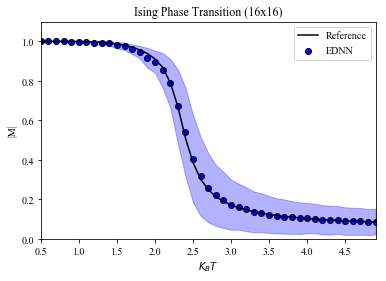

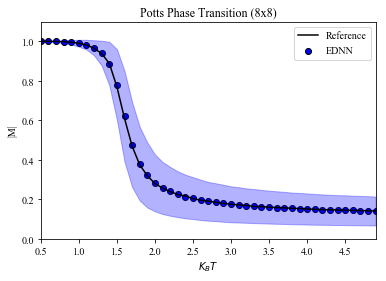

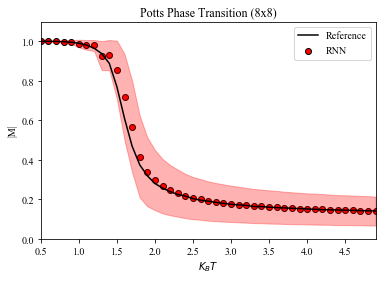

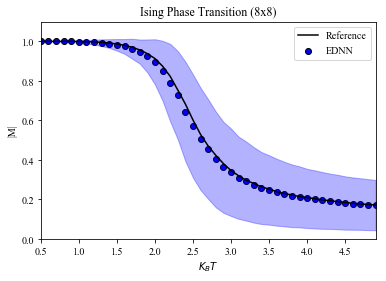

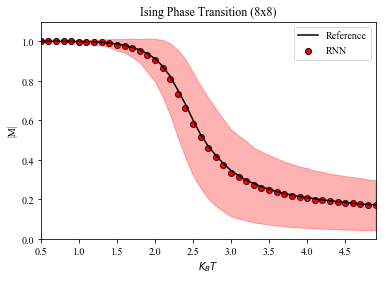

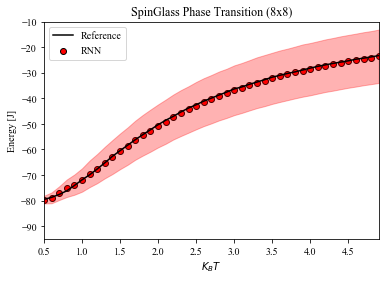

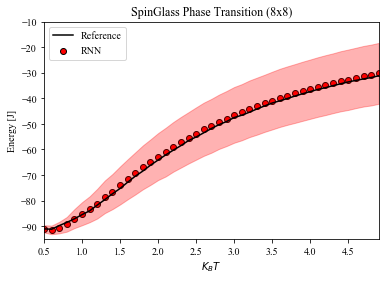

In [5]:
#PLOTTING AND SSAVING ALL THE PHASE TRANSITIONS
#smooth_show(ISING8,window_len=4)
#errplt(*SPINSRNN420_8,style="dot",label="RNN",c="r")
save_dir = "C:\\Users\\sprag\\Dropbox\\2019-RNN\\figures"
ednnstyle={"style":"scatter","label":"EDNN","c":"b","edgecolors":'k',"errc":(0,0,1,0.3)}
rnnstyle={"style":"scatter","label":"RNN","c":"r","edgecolors":'k',"errc":(1,0,0,0.3)}
errplt(*ISINGEDNN16,**ednnstyle)
errplt(*ISING16,42,"Ising Phase Transition (16x16)","","|M|",label="Reference",ls="-",c="k")
plt.legend()
plt.savefig(save_dir+"\Ising_phase_EDNN_16.pdf")
plt.show()
errplt(*POTTSEDNN8,**ednnstyle)
errplt(*POTTS8,42,"Potts Phase Transition (8x8)","","|M|",label="Reference",ls="-",c="k")
plt.legend()
plt.savefig(save_dir+"\Potts_phase_EDNN_8.pdf")
plt.show()
errplt(*POTTSRNN8,**rnnstyle)
errplt(*POTTS8,42,"Potts Phase Transition (8x8)","","|M|",label="Reference",ls="-",c="k")
plt.legend()
plt.savefig(save_dir+"\Potts_phase_RNN_8.pdf")
plt.show()
errplt(*ISINGEDNN8,**ednnstyle)
errplt(*ISING8,42,"Ising Phase Transition (8x8)","","|M|",label="Reference",ls="-",c="k")
plt.legend()
plt.savefig(save_dir+"\Ising_phase_EDNN_8.pdf")
plt.show()
errplt(*ISINGRNN8,**rnnstyle)
errplt(*ISING8,42,"Ising Phase Transition (8x8)","","|M|",label="Reference",ls="-",c="k")
plt.legend()
plt.savefig(save_dir+"\Ising_phase_RNN_8.pdf")
plt.show()
errplt(*SPINSRNN420_8,ylabel="Energy [J]",**rnnstyle)
errplt(*SPINS420_8,420,"SpinGlass Phase Transition (8x8)","","Energy [J]",label="Reference",ls="-",c="k")
plt.legend()
plt.savefig(save_dir+"\Spinglass_phase_NN_0.pdf")
plt.show()
errplt(*SPINSRNN69_8,ylabel="Energy [J]",**rnnstyle)
errplt(*SPINS69_8,"SpinGlass Phase Transition (8x8)","","Energy [J]",label="Reference",ls="-",c="k")
plt.legend(loc='upper left')
plt.savefig(save_dir+"\Spinglass_phase_NN_1.pdf")
plt.show()

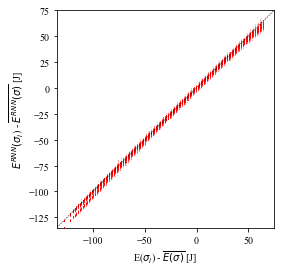

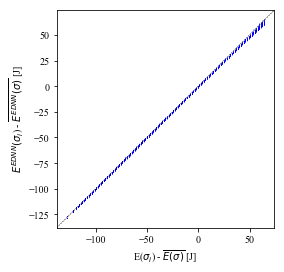

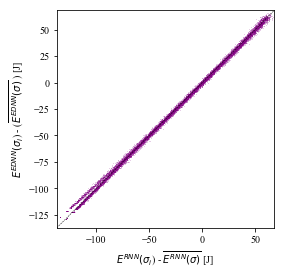

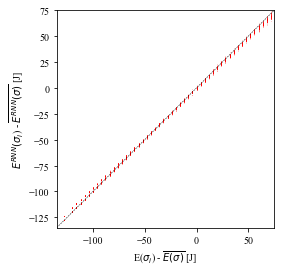

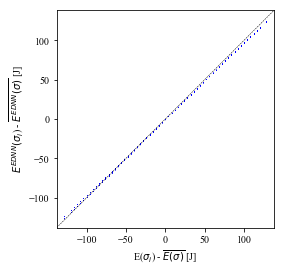

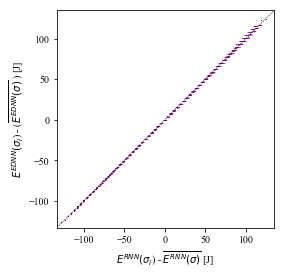

In [20]:


def pull_graphs(fn,s="Potts"):
    """Graphs the test outputs from an h5py file""""
    with h5py.File(fn,"r") as f:
        bins=f["REF_BINS"]
        x_=f["REF"]
        rnnfinal=f["RNN_BINS"]
        ednnfinal=f["EDNN_BINS"]
        rnn=f["RNN"]
        ednn=f["EDNN"]
        bins = np.asarray(bins)
        x_ = np.asarray(x_)
        rnnfinal = np.asarray(rnnfinal)
        ednnfinal = np.asarray(ednnfinal)
        rnn = np.asarray(rnn)
        ednn = np.asarray(ednn)
    f.close()
    ns=100 if s=="Potts" else 101
    deltaplt(x_[::ns],rnn[::ns],0,"RNN","r",points=True,delta=False,lims=(-135,75))
    #plt.legend()
    plt.sabtsavefig("C:/Users/sprag/Dropbox/2019-RNN/figures/%s_linear_RNN_True.pdf"%s)
    plt.show()
    #return
    deltaplt(x_[::ns],ednn[::ns],0,"EDNN","b",points=True,delta=False)
    #plt.legend()
    plt.savefig("C:/Users/sprag/Dropbox/2019-RNN/figures/%s_linear_EDNN_True.pdf"%s)
    plt.show()
    
    deltaplt(rnn[::ns],ednn[::ns],0,"RNN v EDNN","purple",points=True,delta=False)
    #plt.legend()
    plt.ylabel(r"$E^{EDNN}(\sigma_i$) - ($\overline{E^{EDNN}(\sigma)}$ ) [J]")
    plt.xlabel(r"$E^{RNN}(\sigma_i$) - $\overline{E^{RNN}(\sigma)}$ [J]")
    plt.savefig("C:/Users/sprag/Dropbox/2019-RNN/figures/%s_linear_EDNN_RNN.pdf"%s)
    plt.show()
    return
    deltaplt(*bin_compare(bins,rnnfinal),"RNN","r",points=False,delta=True)
    #plt.show()
    deltaplt(*bin_compare(bins,ednnfinal),"EDNN","b",points=False,delta=True)
    plt.legend()
    plt.ylabel(r"$E^{model}(\sigma_i$)-E($\sigma_i$) - ($\overline{E^{model}(\sigma)}-\overline{E(\sigma)}$ ) [J]")
    #potts
    if s=="Potts":
        plt.ylim(-5.5,5.5)
    else:
        plt.ylim(-10,10)
    plt.savefig("C:/Users/sprag/Dropbox/2019-RNN/figures/%s_horizontal_EDNNRNN_True.pdf"%s,dpi=500)
    plt.show()
    
    deltaplt(rnn,ednn,1,"RNN vs EDNN","purple",points=True,delta=True)
    plt.ylabel(r"E^{EDNN}($\sigma_i$)-E^{RNN}($\sigma_i$) - ($\overline{E^{EDNN}(\sigma)}-\overline{E^{RNN}(\sigma)}$ ) [J]")
    plt.xlabel(r"E^{RNN}($\sigma_i$) - $\overline{E^{RNN}(\sigma)}$")
    #plt.ylim(-6.5,6.5)
    plt.savefig("%s_ednn_oer_rnn.png"%s,dpi=1000)
    plt.show()
    
    k = rebin_compare(bins,rnnfinal,ednnfinal,1 if s=="Potts" else 2.5)
    deltaplt(*k,"RNN vs EDNN","purple",points=False,delta=True)
    plt.ylabel(r"$E^{EDNN}(\sigma_i$)-$E^{RNN}(\sigma_i$) - ($\overline{E^{EDNN}(\sigma)}-\overline{E^{RNN}(\sigma)}$ ) [J]")
    plt.xlabel(r"$E^{RNN}(\sigma_i$) - $\overline{E^{RNN}(\sigma)}$")
    plt.ylim(-6.5,6.5)
    plt.savefig("C:/Users/sprag/Dropbox/2019-RNN/figures/%s_horizontal_EDNN_RNN.pdf"%s,dpi=500)
    plt.show()
    


pull_graphs("raw_curves/pottserrors.h5py","Potts")

pull_graphs("raw_curves/isingerrors.h5py","Ising")

In [15]:
model=RNN("D:/Lattice-RNN/models/2SP",cbatch=[2000]*5,code="",model="POTTS1",flat="SPIRAL",T=4)

None
2000
INFO:tensorflow:Restoring parameters from D:/Lattice-RNN/models/2SPPOTTS1/model.ckpt-384000


D:\Ananconda\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


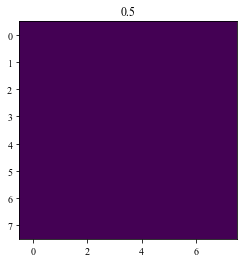

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[-134.3277797  -128.4064895  -127.18723251]
[-134.3277797  -128.4064895  -127.18723251]


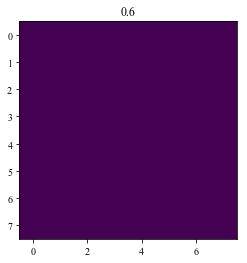

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[-134.3277797  -128.4064895  -127.18723251]
[-134.3277797  -128.4064895  -127.18723251]


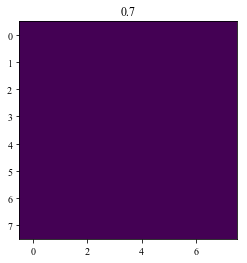

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[-127.18723251 -134.3277797  -128.4064895 ]
[-134.3277797  -128.4064895  -127.18723251]


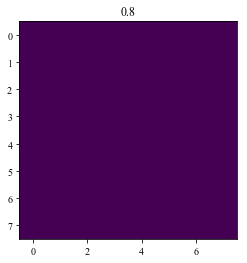

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[-134.3277797  -128.4064895  -127.18723251]
[-134.3277797  -128.4064895  -127.18723251]


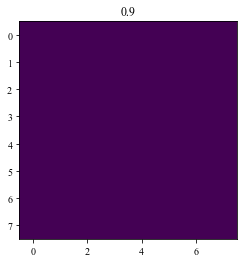

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[-134.3277797  -128.4064895  -127.18723251]
[-134.3277797  -128.4064895  -127.18723251]


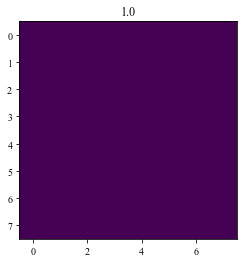

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[-127.18723251 -134.3277797  -128.4064895 ]
[-134.3277797  -128.4064895  -127.18723251]


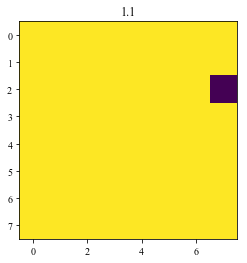

[[2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 0]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2]]
[-122.45481868 -121.33358308 -128.8205453 ]
[-134.3277797  -128.4064895  -127.18723251]


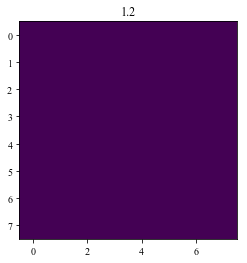

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[-134.3277797  -128.4064895  -127.18723251]
[-134.3277797  -128.4064895  -127.18723251]


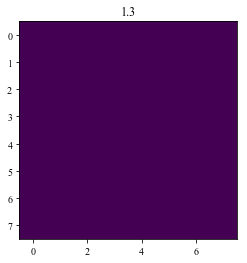

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[-127.18723251 -134.3277797  -128.4064895 ]
[-134.3277797  -128.4064895  -127.18723251]


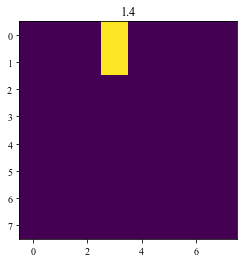

[[1 1 1 2 1 1 1 1]
 [1 1 1 2 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[-124.23770283 -119.58177645 -117.75718402]
[-134.3277797  -128.4064895  -127.18723251]


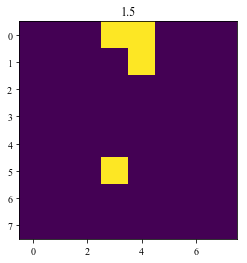

[[1 1 1 2 2 1 1 1]
 [1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[-113.85384233 -110.24065005 -109.40244998]
[-134.3277797  -128.4064895  -127.18723251]


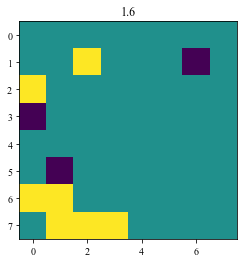

[[1 1 1 1 1 1 1 1]
 [1 1 2 1 1 1 0 1]
 [2 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1]
 [2 2 1 1 1 1 1 1]
 [1 2 2 2 1 1 1 1]]
[-88.69079108 -82.06352263 -82.81982453]
[-134.3277797  -128.4064895  -127.18723251]


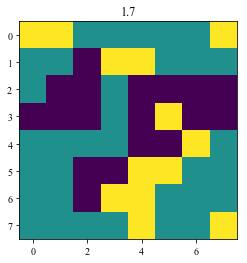

[[2 2 1 1 1 1 1 2]
 [1 1 0 2 2 1 1 1]
 [1 0 0 1 0 0 0 0]
 [0 0 0 1 0 2 0 0]
 [1 1 1 1 0 0 2 1]
 [1 1 0 0 2 2 1 1]
 [1 1 0 2 2 1 1 1]
 [1 1 1 1 2 1 1 2]]
[-39.76632655 -37.86692602 -36.81041918]
[-134.3277797  -128.4064895  -127.18723251]


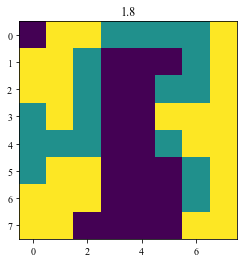

[[0 2 2 1 1 1 1 2]
 [2 2 1 0 0 0 1 2]
 [2 2 1 0 0 1 1 2]
 [1 2 1 0 0 2 2 2]
 [1 1 1 0 0 1 2 2]
 [1 2 2 0 0 0 1 2]
 [2 2 2 0 0 0 1 2]
 [2 2 0 0 0 0 2 2]]
[-46.93890709 -44.6612444  -47.35680965]
[-134.3277797  -128.4064895  -127.18723251]


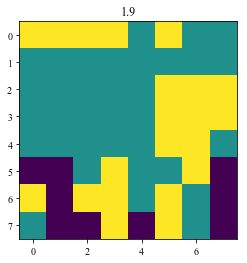

[[2 2 2 2 1 2 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 2 2 2]
 [1 1 1 1 1 2 2 2]
 [1 1 1 1 1 2 2 1]
 [0 0 1 2 1 1 2 0]
 [2 0 2 2 1 2 1 0]
 [1 0 0 2 0 2 1 0]]
[-46.58576215 -44.66444096 -42.82806511]
[-134.3277797  -128.4064895  -127.18723251]


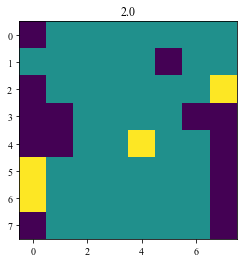

[[0 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1]
 [0 1 1 1 1 1 1 2]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 2 1 1 0]
 [2 1 1 1 1 1 1 0]
 [2 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 0]]
[-77.49630096 -75.60269726 -71.10784632]
[-134.3277797  -128.4064895  -127.18723251]


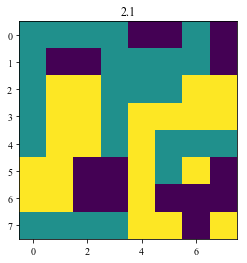

[[1 1 1 1 0 0 1 0]
 [1 0 0 1 1 1 1 0]
 [1 2 2 1 1 1 2 2]
 [1 2 2 1 2 2 2 2]
 [1 2 2 1 2 1 1 1]
 [2 2 0 0 2 1 2 0]
 [2 2 0 0 2 0 0 0]
 [1 1 1 1 2 2 0 2]]
[-31.84153832 -29.49100805 -30.54599749]
[-134.3277797  -128.4064895  -127.18723251]


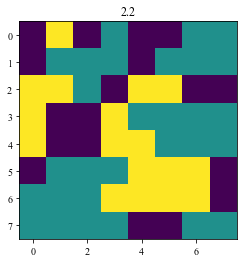

[[0 2 0 1 0 0 1 1]
 [0 1 1 1 0 1 1 1]
 [2 2 1 0 2 2 0 0]
 [2 0 0 2 1 1 1 1]
 [2 0 0 2 2 1 1 1]
 [0 1 1 1 2 2 2 0]
 [1 1 1 2 2 2 2 0]
 [1 1 1 1 0 0 1 1]]
[-27.57273259 -28.18577907 -29.18144101]
[-134.3277797  -128.4064895  -127.18723251]


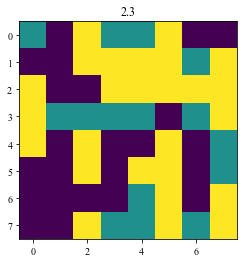

[[1 0 2 1 1 2 0 0]
 [0 0 2 2 2 2 1 2]
 [2 0 0 2 2 2 2 2]
 [2 1 1 1 1 0 1 2]
 [2 0 2 0 0 2 0 1]
 [0 0 2 0 2 2 0 1]
 [0 0 0 0 1 2 0 2]
 [0 0 2 1 1 2 1 2]]
[-20.0966407  -21.02822849 -17.54156342]
[-134.3277797  -128.4064895  -127.18723251]


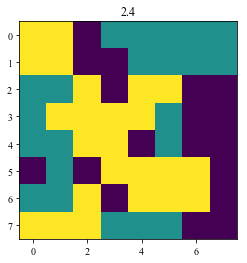

[[2 2 0 1 1 1 1 1]
 [2 2 0 0 1 1 1 1]
 [1 1 2 0 2 2 0 0]
 [1 2 2 2 2 1 0 0]
 [1 1 2 2 0 1 0 0]
 [0 1 0 2 2 2 2 0]
 [1 1 2 0 2 2 2 0]
 [2 2 2 1 1 1 0 0]]
[-37.16015296 -35.13023009 -35.94028351]
[-134.3277797  -128.4064895  -127.18723251]


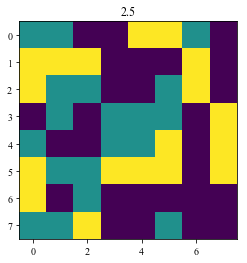

[[1 1 0 0 2 2 1 0]
 [2 2 2 0 0 0 2 0]
 [2 1 1 0 0 1 2 0]
 [0 1 0 1 1 1 0 2]
 [1 0 0 1 1 2 0 2]
 [2 1 1 2 2 2 0 2]
 [2 0 1 0 0 0 0 0]
 [1 1 2 0 0 1 0 0]]
[-14.77568029 -13.46107802 -12.87887425]
[-134.3277797  -128.4064895  -127.18723251]


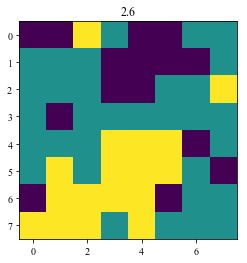

[[0 0 2 1 0 0 1 1]
 [1 1 1 0 0 0 0 1]
 [1 1 1 0 0 1 1 2]
 [1 0 1 1 1 1 1 1]
 [1 1 1 2 2 2 0 1]
 [1 2 1 2 2 2 1 0]
 [0 2 2 2 2 0 1 1]
 [2 2 2 1 2 1 1 1]]
[-40.1592352  -35.61178875 -33.4537081 ]
[-134.3277797  -128.4064895  -127.18723251]


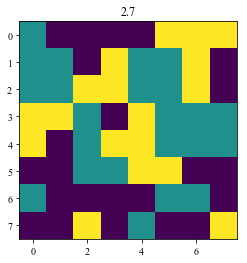

[[1 0 0 0 0 2 2 2]
 [1 1 0 2 1 1 2 0]
 [1 1 2 2 1 1 2 0]
 [2 2 1 0 2 1 1 1]
 [2 0 1 2 2 1 1 1]
 [0 0 1 1 2 2 0 0]
 [1 0 0 0 0 1 1 0]
 [0 0 2 0 1 0 0 2]]
[-18.87383663 -16.27142661 -15.38002311]
[-134.3277797  -128.4064895  -127.18723251]


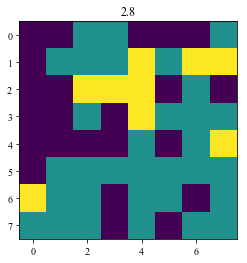

[[0 0 1 1 0 0 0 1]
 [0 1 1 1 2 1 2 2]
 [0 0 2 2 2 0 1 0]
 [0 0 1 0 2 1 1 1]
 [0 0 0 0 1 0 1 2]
 [0 1 1 1 1 1 1 1]
 [2 1 1 0 1 1 0 1]
 [1 1 1 0 1 0 1 1]]
[-24.82513461 -24.63598364 -25.34867541]
[-134.3277797  -128.4064895  -127.18723251]


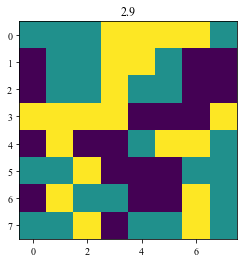

[[1 1 1 2 2 2 2 1]
 [0 1 1 2 2 1 0 0]
 [0 1 1 2 1 1 0 0]
 [2 2 2 2 0 0 0 2]
 [0 2 0 0 1 2 2 1]
 [1 1 2 0 0 0 1 1]
 [0 2 1 1 0 0 2 1]
 [1 1 2 0 1 1 2 1]]
[-19.96282892 -21.6039311  -20.44948258]
[-134.3277797  -128.4064895  -127.18723251]


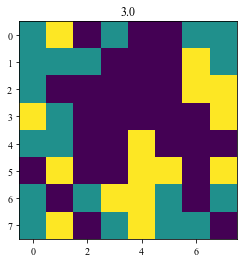

[[1 2 0 1 0 0 1 1]
 [1 1 1 0 0 0 2 1]
 [1 0 0 0 0 0 2 2]
 [2 1 0 0 0 0 0 2]
 [1 1 0 0 2 0 0 0]
 [0 2 0 0 2 2 0 2]
 [1 0 1 2 2 1 0 1]
 [1 2 0 1 2 1 1 0]]
[-26.99758554 -25.92430116 -27.01582089]
[-134.3277797  -128.4064895  -127.18723251]


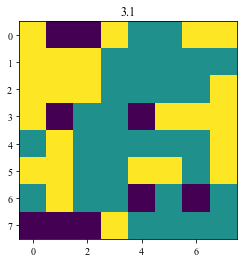

[[2 0 0 2 1 1 2 2]
 [2 2 2 1 1 1 1 1]
 [2 2 2 1 1 1 1 2]
 [2 0 1 1 0 2 2 2]
 [1 2 1 1 1 1 1 2]
 [2 2 1 1 2 2 1 2]
 [1 2 1 1 0 1 0 1]
 [0 0 0 2 1 1 1 1]]
[-35.53990071 -32.20249434 -33.65904714]
[-134.3277797  -128.4064895  -127.18723251]


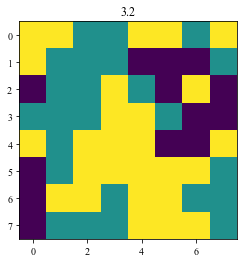

[[2 2 1 1 2 2 1 2]
 [2 1 1 1 0 0 0 1]
 [0 1 1 2 1 0 2 0]
 [1 1 1 2 2 1 0 0]
 [2 1 2 2 2 0 0 2]
 [0 1 2 2 2 2 2 1]
 [0 2 2 1 2 2 1 1]
 [0 1 1 1 2 2 2 1]]
[-26.46019779 -25.51102942 -27.75745092]
[-134.3277797  -128.4064895  -127.18723251]


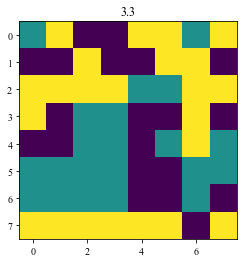

[[1 2 0 0 2 2 1 2]
 [0 0 2 0 0 2 2 0]
 [2 2 2 2 1 1 2 2]
 [2 0 1 1 0 0 2 0]
 [0 0 1 1 0 1 2 1]
 [1 1 1 1 0 0 1 1]
 [1 1 1 1 0 0 1 0]
 [2 2 2 2 2 2 0 2]]
[-22.66077302 -20.65185254 -22.33080121]
[-134.3277797  -128.4064895  -127.18723251]


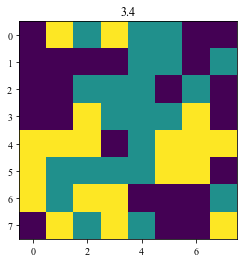

[[0 2 1 2 1 1 0 0]
 [0 0 0 0 1 1 0 1]
 [0 0 1 1 1 0 1 0]
 [0 0 2 1 1 1 2 0]
 [2 2 2 0 1 2 2 2]
 [2 1 1 1 1 2 2 0]
 [2 1 2 2 0 0 0 1]
 [0 2 1 2 1 0 0 2]]
[-22.8673806  -22.14968932 -23.9359912 ]
[-134.3277797  -128.4064895  -127.18723251]


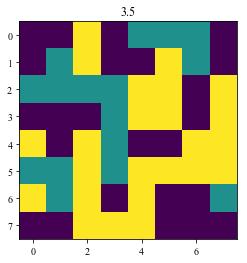

[[0 0 2 0 1 1 1 0]
 [0 1 2 0 0 2 1 0]
 [1 1 1 1 2 2 0 2]
 [0 0 0 1 2 2 0 2]
 [2 0 2 1 0 0 2 2]
 [1 1 2 1 2 2 2 2]
 [2 1 2 0 2 0 0 1]
 [0 0 2 2 2 0 0 0]]
[-20.20810851 -21.0200292  -22.36862239]
[-134.3277797  -128.4064895  -127.18723251]


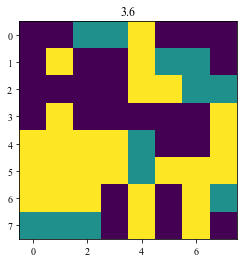

[[0 0 1 1 2 0 0 0]
 [0 2 0 0 2 1 1 0]
 [0 0 0 0 2 2 1 1]
 [0 2 0 0 0 0 0 2]
 [2 2 2 2 1 0 0 2]
 [2 2 2 2 1 2 2 2]
 [2 2 2 0 2 0 2 1]
 [1 1 1 0 2 0 2 0]]
[-32.26194327 -32.50501642 -31.06367925]
[-134.3277797  -128.4064895  -127.18723251]


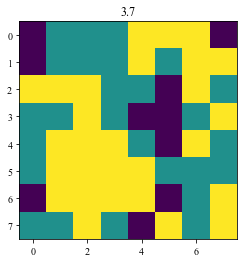

[[0 1 1 1 2 2 2 0]
 [0 1 1 1 2 1 2 2]
 [2 2 2 1 1 0 2 1]
 [1 1 2 1 0 0 1 2]
 [1 2 2 2 1 0 2 1]
 [1 2 2 2 2 1 1 1]
 [0 2 2 2 2 0 1 2]
 [1 1 2 1 0 2 1 2]]
[-17.44872839 -17.88940591 -18.63618738]
[-134.3277797  -128.4064895  -127.18723251]


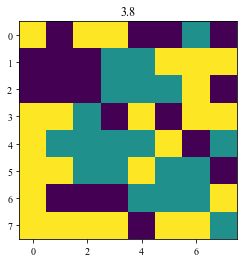

[[2 0 2 2 0 0 1 0]
 [0 0 0 1 1 2 2 2]
 [0 0 0 1 1 1 2 0]
 [2 2 1 0 2 0 2 2]
 [2 1 1 1 1 2 0 1]
 [2 2 1 1 2 1 1 0]
 [2 0 0 0 1 1 1 2]
 [2 2 2 2 0 2 2 1]]
[-13.78366212 -14.47513133 -13.39217252]
[-134.3277797  -128.4064895  -127.18723251]


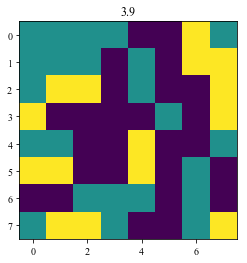

[[1 1 1 1 0 0 2 1]
 [1 1 1 0 1 0 2 2]
 [1 2 2 0 1 0 0 2]
 [2 0 0 0 0 1 0 2]
 [1 1 0 0 2 0 0 1]
 [2 2 0 0 2 0 1 0]
 [0 0 1 1 1 0 1 0]
 [1 2 2 1 0 0 1 2]]
[-19.81910934 -17.80189504 -22.95640341]
[-134.3277797  -128.4064895  -127.18723251]


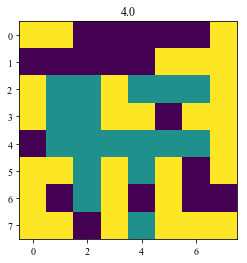

[[2 2 0 0 0 0 0 2]
 [0 0 0 0 0 2 2 2]
 [2 1 1 2 1 1 1 2]
 [2 1 1 2 2 0 2 2]
 [0 1 1 1 1 1 1 2]
 [2 2 1 2 1 2 0 2]
 [2 0 1 2 0 2 0 0]
 [2 2 0 2 1 2 2 2]]
[-27.78364213 -24.68377616 -29.51152394]
[-134.3277797  -128.4064895  -127.18723251]


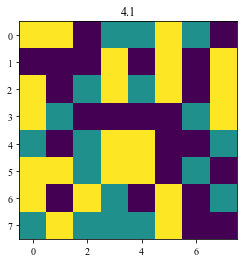

[[2 2 0 1 1 2 1 0]
 [0 0 0 2 0 2 0 2]
 [2 0 1 2 1 2 0 2]
 [2 1 0 0 0 0 1 2]
 [1 0 1 2 2 0 0 1]
 [2 2 1 2 2 0 1 0]
 [2 0 2 1 0 2 0 1]
 [1 2 1 1 1 2 0 0]]
[5.77670121 2.9766759  4.44492879]
[-134.3277797  -128.4064895  -127.18723251]


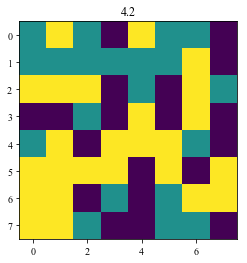

[[1 2 1 0 2 1 1 0]
 [1 1 1 1 1 1 2 0]
 [2 2 2 0 1 0 2 1]
 [0 0 1 0 2 0 2 0]
 [1 2 0 2 2 2 1 0]
 [2 2 2 2 0 2 0 2]
 [2 2 0 1 0 1 2 2]
 [2 2 1 0 0 1 1 0]]
[-11.83939296 -10.27457843  -8.46196588]
[-134.3277797  -128.4064895  -127.18723251]


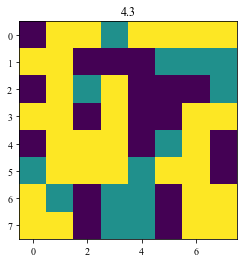

[[0 2 2 1 2 2 2 2]
 [2 2 0 0 0 1 1 1]
 [0 2 1 2 0 0 0 1]
 [2 2 0 2 0 0 2 2]
 [0 2 2 2 0 1 2 0]
 [1 2 2 2 1 2 2 0]
 [2 1 0 1 1 0 2 2]
 [2 2 0 1 1 0 2 2]]
[-21.7300787  -25.2809195  -20.59791758]
[-134.3277797  -128.4064895  -127.18723251]


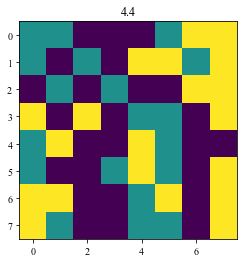

[[1 1 0 0 0 1 2 2]
 [1 0 1 0 2 2 1 2]
 [0 1 0 1 0 0 2 2]
 [2 0 2 0 1 1 0 2]
 [1 2 0 0 2 1 0 0]
 [1 0 0 1 2 1 0 2]
 [2 2 0 0 1 2 0 2]
 [2 1 0 0 1 1 0 2]]
[-4.33413373 -5.3713586  -6.33704999]
[-134.3277797  -128.4064895  -127.18723251]


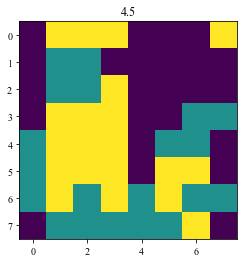

[[0 2 2 2 0 0 0 2]
 [0 1 1 0 0 0 0 0]
 [0 1 1 2 0 0 0 0]
 [0 2 2 2 0 0 1 1]
 [1 2 2 2 0 1 1 0]
 [1 2 2 2 0 2 2 0]
 [1 2 1 2 1 2 1 1]
 [0 1 1 1 1 1 2 0]]
[-33.65682217 -35.28693088 -35.77691079]
[-134.3277797  -128.4064895  -127.18723251]


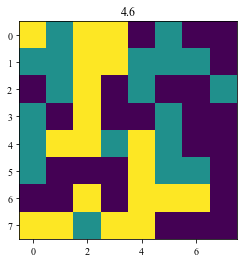

[[2 1 2 2 0 1 0 0]
 [1 1 2 2 1 1 1 0]
 [0 1 2 0 1 0 0 1]
 [1 0 2 0 0 1 0 0]
 [1 2 2 1 2 1 0 0]
 [1 0 0 0 2 1 1 0]
 [0 0 2 0 2 2 2 0]
 [2 2 1 2 2 0 0 0]]
[-13.21033694 -11.68021566 -14.69094697]
[-134.3277797  -128.4064895  -127.18723251]


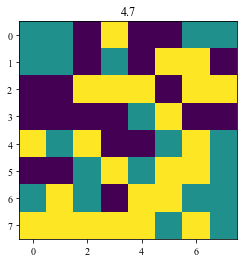

[[1 1 0 2 0 0 1 1]
 [1 1 0 1 0 2 2 0]
 [0 0 2 2 2 0 2 2]
 [0 0 0 0 1 2 0 0]
 [2 1 2 0 0 1 2 1]
 [0 0 1 2 1 2 2 1]
 [1 2 1 0 2 2 1 1]
 [2 2 2 2 2 1 2 1]]
[-0.13051046 -1.43655792 -0.72975268]
[-134.3277797  -128.4064895  -127.18723251]


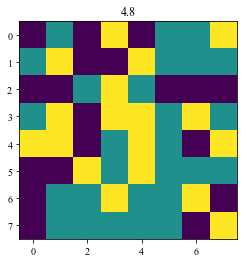

[[0 1 0 2 0 1 1 2]
 [1 2 0 0 2 1 1 1]
 [0 0 1 2 1 0 0 0]
 [1 2 0 2 2 1 2 1]
 [2 2 0 1 2 1 0 2]
 [0 0 2 1 2 1 1 1]
 [0 1 1 2 1 1 2 0]
 [0 1 1 1 1 1 0 2]]
[-6.10507732 -4.37784439 -4.21153333]
[-134.3277797  -128.4064895  -127.18723251]


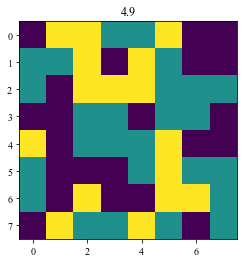

[[0 2 2 1 1 2 0 0]
 [1 1 2 0 2 1 0 0]
 [1 0 2 2 2 1 1 1]
 [0 0 1 1 0 1 1 0]
 [2 0 1 1 1 2 0 0]
 [1 0 0 0 1 2 1 1]
 [1 0 2 0 0 2 2 1]
 [0 2 1 1 2 1 0 1]]
[-17.17224077 -13.97376881 -14.56767468]
[-134.3277797  -128.4064895  -127.18723251]


In [32]:
#MISC CODE
f = h5py.File("F:/pottsrnn8.h5py")
for z in range(45):
    thing= np.asarray(f["States"][z])
    plt.imshow(thing)
    plt.title(str(0.5+z/10))
    plt.show()
    print(thing)
    print(model.Hs([thing,(thing+1)%3,(thing+2)%3]))
    print(model.Hs([np.ones([8,8],dtype=np.int32),np.ones([8,8],dtype=np.int32)+1,np.zeros([8,8],dtype=np.int32)]))
f.close()